# Not-Heineken

## Making sure we only drink the best beer

Installing dependencies

In [0]:
!pip install -U -q PyDrive

In [2]:
# Test google drive api

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. Load a file by ID and print its contents.
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Uploaded file with ID 1xLofl59oZ4HtoNaGql1KxViK__SE9ke9
Downloaded content "Sample upload file content"


In [3]:
# mount drive

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
print('{} - {}'.format(creds.client_id,creds.client_secret))

32555940559.apps.googleusercontent.com - ZmssLNjJy2998hD4CTg2ejr2


In [6]:
import pandas as pd
df = pd.read_csv('drive/AIExpo2018/test.csv')
df.head(5)

,age,height
0,4,56
1,5,67
2,3,48
3,4,60
4,6,71


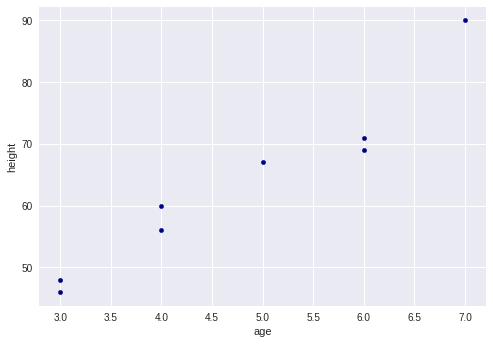

In [7]:
ax1 = df.plot.scatter(x='age',y='height',c='DarkBlue')

In [8]:
# preprocess images

dirs = os.listdir('drive/AIEXpo2018/img')

for d in dirs:
  print(d)

not-heineken
heineken


In [0]:
from PIL import Image

def resize_and_save(target_path, cible_path, dirs):
    """ Load images from the original path to resize them and save it to a target path """
    for item in dirs:
        #print('processing: {}'.format(item))
        im = Image.open(cible_path+item).convert('RGB')
        file, extension = os.path.splitext(cible_path+item)
        imResized = im.resize((64, 64), Image.ANTIALIAS)
        filename = file.split('/')[4]
        imResized.save(target_path + filename + extension, 'JPEG', quality=90)

In [10]:
import datetime

# preprocess all the images files - (64,64)

# target_path list
#target_path = ['drive/AIExpo2018/preprocessed/heineken/', 'drive/AIExpo2018/preprocessed/not-heineken/']
#original_path = ['drive/AIExpo2018/img/heineken/', 'drive/AIExpo2018/img/not-heineken/']

target_path = ['drive/AIExpo2018/preprocessed/not-heineken/']
original_path = ['drive/AIExpo2018/img/not-heineken/']

# start the resize process
dt = datetime.datetime.now()
print('Starting resizing images ...')
for t, c in zip(target_path, original_path):
    dirs = os.listdir(c)
    resize_and_save(t, c, dirs)
    print('{} resized in {}'.format(t, (datetime.datetime.now()-dt)))
print('Total time: {}'.format(datetime.datetime.now()-dt))

Starting resizing images ...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


drive/AIExpo2018/preprocessed/not-heineken/ resized in 0:14:30.607244
Total time: 0:14:30.607585


In [0]:
!pip install -q keras